### ** 해석과 판단의 이유를 모두 상세하게 적어주세요 **


In [2]:
%matplotlib inline 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
plt.style.use('seaborn')
plt.rc('font', family='Apple SD Gothic Neo')
plt.rc('axes', unicode_minus=False)

# Data 

데이터 출처 : https://www.kaggle.com/avikasliwal/used-cars-price-prediction 

< y > 
* **Price** : The price of the used car in INR Lakhs.



< X > 
* Name : The brand and model of the car
* Location : The location in which the car is being sold or is available for purchase.
* Year : The year or edition of the model.
* Kilometers_Driven : The total kilometres driven in the car by the previous owner(s) in KM.
* Fuel_Type : The type of fuel used by the car. (Petrol, Diesel, Electric, CNG, LPG)
* Transmission : The type of transmission used by the car. (Automatic / Manual)
* Owner_Type : Whether the ownership is Firsthand, Second hand or other.
* Mileage : The standard mileage offered by the car company in kmpl or km/kg
* Engine : The displacement volume of the engine in CC.
* Power : The maximum power of the engine in bhp.
* Seats : The number of seats in the car.
* New_Price : The price of a new car of the same model.

In [4]:
# Load Data 
data = pd.read_csv("assignment2_data.csv")
data.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


# EDA

In [5]:
data.shape # 6019개의 데이터임을 확인할 수 있다.

(6019, 14)

In [6]:
# 결측치 체크
data.isnull().sum()

Unnamed: 0              0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

- 마일리지는 차마다 달라질 수 있는 고유값이므로 마일리지가 결측된 경우 제외하기로 했다.
- 이외에는 `Engine`, `power`, `Seats`, `New_price` 에서 결측값이 발견되었다.
- `New_price` 는 결측값이 매우 많고, `New_price` 가 없는 차종도 있어서 feature 를 삭제했다
- 결측값은 양이 많지 않아서 삭제했다.

In [7]:
dropped_data = data.drop(['New_Price', 'Unnamed: 0'], axis=1)
dropped_data = dropped_data.dropna()

In [8]:
dropped_data.shape # 결측값이 제거된 후 5975개의 데이터가 남았다.

(5975, 12)

In [9]:
dropped_data

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,4.75
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,4.00
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,2.90
6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,2.65


각 범주형 피처들의 개수를 확인해 보았다.

In [10]:
print("Name 의 개수 : ", len(dropped_data['Name'].unique()))
print("Location 의 개수 : ", len(dropped_data['Location'].unique()))
print("Year 의 개수 : ", len(dropped_data['Year'].unique()))
print("Fuel_Type 의 개수 : ", len(dropped_data['Fuel_Type'].unique()))
print("Transmission 의 개수 : ", len(dropped_data['Transmission'].unique()))
print("Owner_Type 의 개수 : ", len(dropped_data['Owner_Type'].unique()))

Name 의 개수 :  1855
Location 의 개수 :  11
Year 의 개수 :  22
Fuel_Type 의 개수 :  4
Transmission 의 개수 :  2
Owner_Type 의 개수 :  4


#### 데이터 가공
- `unnamed 0` 데이터는 없어도 되므로 삭제한다.
- `Name` 은 과적합 방지 및 모델 단순화를 위해 세부모델명을 포기하고, 제조사만 남겨두었다.
- 그 외의 피처들은 단위를 제거했다.
- `Mileage` 피처는 단위를 통일시키고자 했으나 단위 변환에 필요한 정보가 부족했다. 따라서 범주형 단위로 새로운 feature를 만들었다.

In [11]:
dropped_data['MileMeasure'] = dropped_data['Mileage'] # 미리 마일리지 행을 복사해둠

In [12]:
for index, row in dropped_data.iterrows():
    dropped_data.at[index,'Name'] = row.Name.split()[0]
    dropped_data.at[index,'Mileage'] = row.Mileage.split()[0]
    dropped_data.at[index, 'MileMeasure'] = row.Mileage.split()[1] # 여기서 단위 표시
    dropped_data.at[index,'Engine'] = row.Engine.split()[0]
    dropped_data.at[index,'Power'] = row.Power.split()[0]

변환 후에 데이터에 `null bhp` 형태로 결측치가 들어있는 것을 확인했다. 이 행 또한 제거해 주었다.

In [13]:
dropped_data = dropped_data.drop(dropped_data[dropped_data.Power == "null"].index, axis=0)

- 메이커만 남은 `Name` 의 수는 30종류였다.

In [14]:
len(dropped_data['Name'].unique())

30

In [15]:
dropped_data # 정리가 완료된 데이터 분포

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,MileMeasure
0,Maruti,Mumbai,2010,72000,CNG,Manual,First,26.6,998,58.16,5.0,1.75,km/kg
1,Hyundai,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.2,5.0,12.50,kmpl
2,Honda,Chennai,2011,46000,Petrol,Manual,First,18.2,1199,88.7,5.0,4.50,kmpl
3,Maruti,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7.0,6.00,kmpl
4,Audi,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2,1968,140.8,5.0,17.74,kmpl
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti,Delhi,2014,27365,Diesel,Manual,First,28.4,1248,74,5.0,4.75,kmpl
6015,Hyundai,Jaipur,2015,100000,Diesel,Manual,First,24.4,1120,71,5.0,4.00,kmpl
6016,Mahindra,Jaipur,2012,55000,Diesel,Manual,Second,14.0,2498,112,8.0,2.90,kmpl
6017,Maruti,Kolkata,2013,46000,Petrol,Manual,First,18.9,998,67.1,5.0,2.65,kmpl


split한 데이터를 수치로 바꾸어 주었다.

In [16]:
dropped_data ["Engine"] = pd.to_numeric(dropped_data["Engine"], downcast='float')
dropped_data ["Seats"] = pd.to_numeric(dropped_data["Seats"], downcast='float')
dropped_data ["Power"] = pd.to_numeric(dropped_data["Power"], downcast='float')
dropped_data ["Price"] = pd.to_numeric(dropped_data["Price"], downcast='float')
dropped_data ["Mileage"] = pd.to_numeric(dropped_data["Mileage"], downcast='float')

### 간단한 그래프 분포

In [17]:
target = dropped_data['Price']

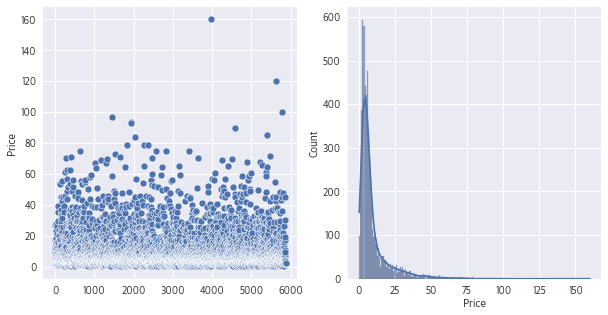

In [18]:
f, axes = plt.subplots(ncols=2, figsize = (10,5))
sns.scatterplot(x = np.arange(0, len(target)), y = target, ax = axes[0])
sns.histplot(target, kde=True, ax=axes[1])
plt.show()

price 가 160 이상인 수치가 관측되었다.

모델의 성능을 위해 가격이 100 이하인 데이터만 사용하겠다.

In [19]:
mask = target[target > 100]

In [20]:
dropped_data = dropped_data.drop(mask.index, axis=0)

In [21]:
target = dropped_data['Price']
dropped_data = dropped_data.drop('Price', axis=1)

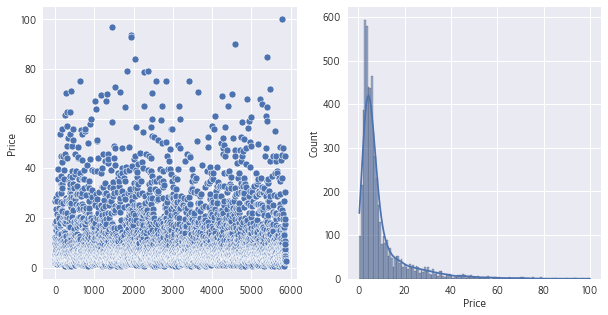

In [22]:
f, axes = plt.subplots(ncols=2, figsize = (10,5))
sns.scatterplot(x = np.arange(0, len(target)), y = target, ax = axes[0])
sns.histplot(target, kde=True, ax=axes[1])
plt.show()

데이터의 일부를 잘라냈음에도 왼쪽으로 치우쳐 있는 것이 보여 로그 변환을 수행해 보았다.

In [23]:
log_target = np.log(target)

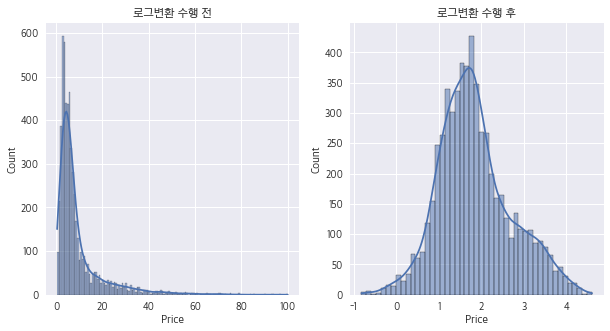

In [24]:
f, axes = plt.subplots(ncols=2, figsize = (10,5))
axes[0].set_title("로그변환 수행 전")
axes[1].set_title("로그변환 수행 후")
sns.histplot(target, kde=True, ax=axes[0])
sns.histplot(log_target, kde=True, ax=axes[1])
plt.show()

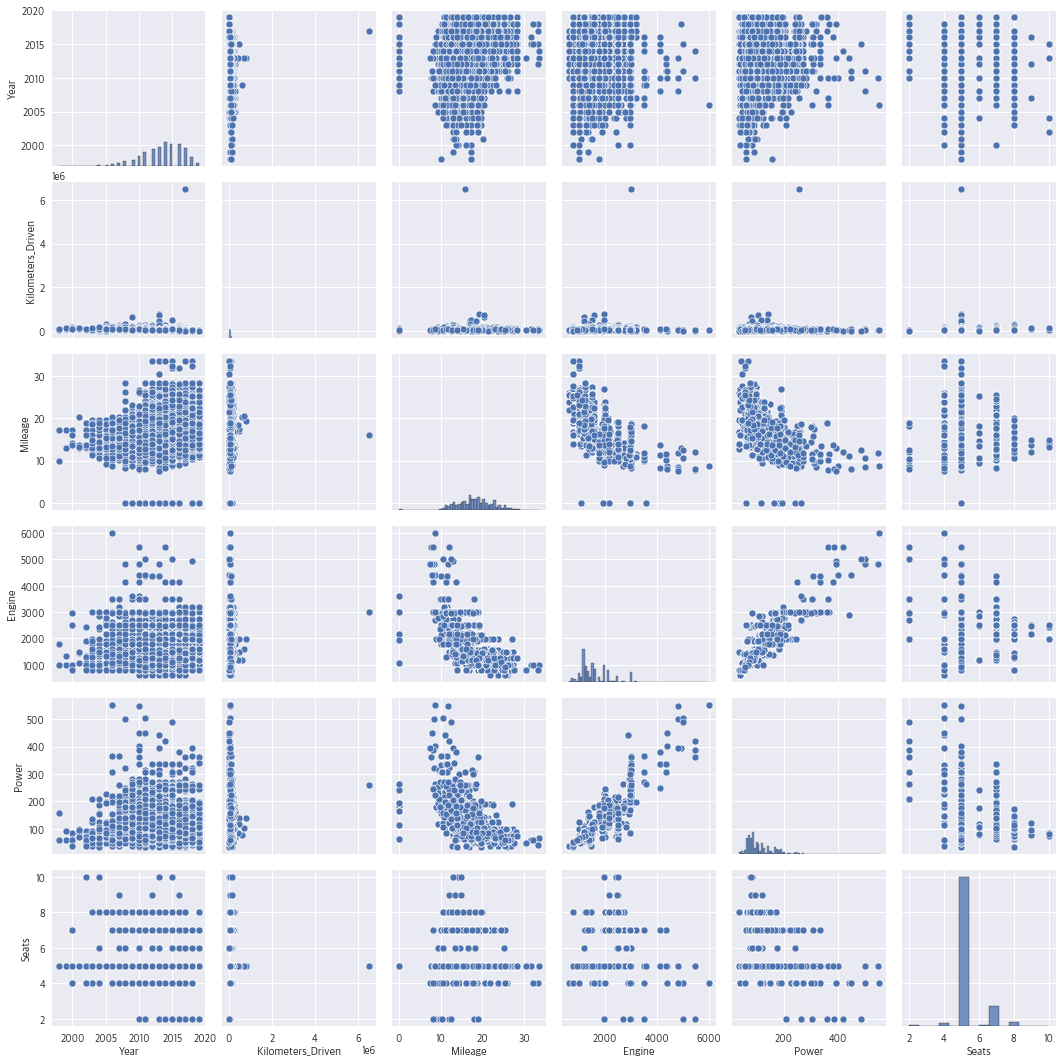

In [206]:
sns.pairplot(dropped_data)
plt.show()

#### 데이터 정규화
각 수치별로 단위가 매우 차이가 나기 때문에 정규화를 수행했다

In [25]:
num_feature = ["Year", "Kilometers_Driven", "Mileage", "Engine", "Power", "Seats"]

norm_data = dropped_data # 임시로 복사
norm_data[num_feature] = (dropped_data[num_feature] - dropped_data[num_feature].mean())/dropped_data[num_feature].std()
norm_data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,MileMeasure
0,Maruti,Mumbai,-1.098876,0.148278,CNG,Manual,First,1.906710,-1.045426,-1.027530,-0.353611,km/kg
1,Hyundai,Pune,0.481098,-0.188015,Diesel,Manual,First,0.318414,-0.071545,0.243233,-0.353611,kmpl
2,Honda,Chennai,-0.782881,-0.133774,Petrol,Manual,First,-0.018497,-0.710238,-0.457143,-0.353611,kmpl
3,Maruti,Chennai,-0.466887,0.311000,Diesel,Manual,First,0.570525,-0.628525,-0.456022,2.133741,kmpl
4,Audi,Coimbatore,-0.150892,-0.191595,Diesel,Automatic,Second,-0.706071,0.572150,0.515913,-0.353611,kmpl


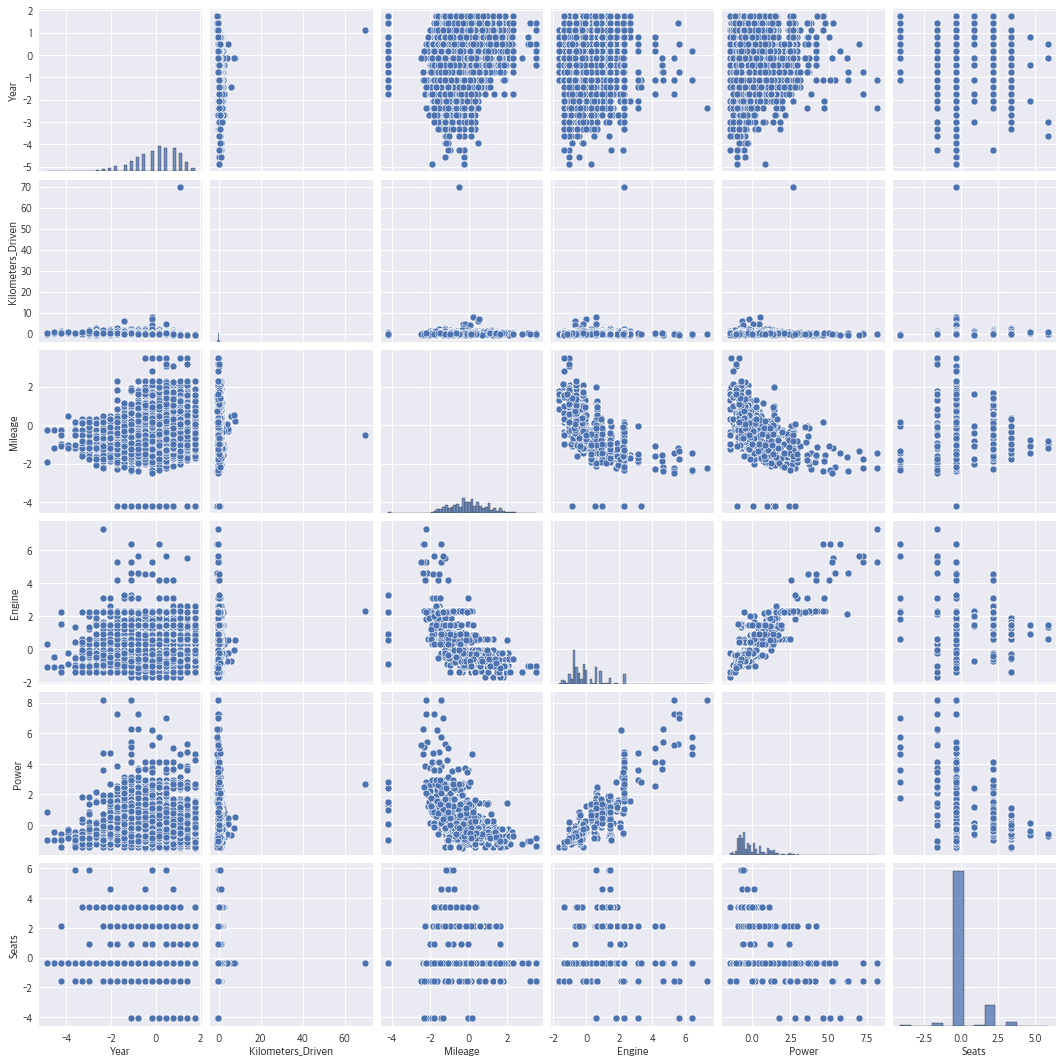

In [209]:
sns.pairplot(norm_data)
plt.show()

`Engine`, `Power` 두개가 선형 관계가 의심된다.

엔진과 차가 나가는 힘 사이에는 직관적으로 상관관계가 있을 수 있다고 생각이 든다.


현재 상태에서 correlation 관계를 확인해 보았다

<AxesSubplot:>

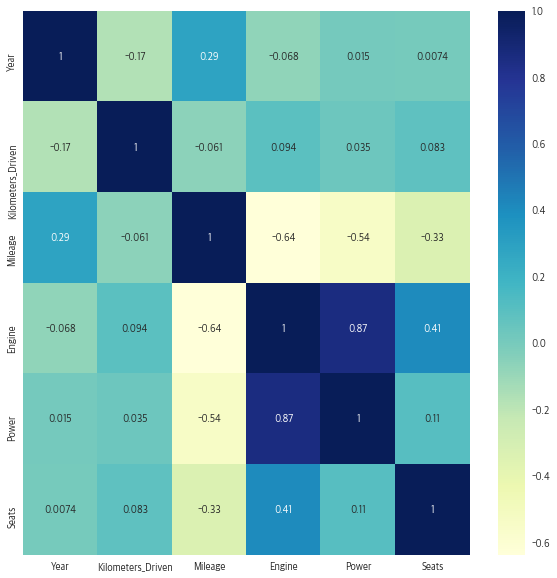

In [210]:
plt.figure(figsize=(10,10))
sns.heatmap(data = norm_data[num_feature].corr(), cmap = 'YlGnBu', annot=True)

### One-Hot 인코딩 & 가변수화
범주형 데이터를 선형회귀 모델에서 사용하기 위해 변환했다.

In [26]:
name_dummy = pd.get_dummies(norm_data.Name, dtype=np.float32)
location_dummy = pd.get_dummies(norm_data.Location, dtype=np.float32)
fuel_dummy = pd.get_dummies(norm_data.Fuel_Type, dtype=np.float32)
transmission_dummy = pd.get_dummies(norm_data.Transmission, dtype=np.float32)
owner_dummy = pd.get_dummies(norm_data.Owner_Type, dtype=np.float32)
mile_dummy = pd.get_dummies(norm_data.MileMeasure, dtype=np.float32)

In [27]:
fixed_data = pd.concat([norm_data[num_feature], name_dummy, location_dummy, fuel_dummy, transmission_dummy, owner_dummy, mile_dummy], axis=1)

In [28]:
fixed_data.head()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Ambassador,Audi,BMW,Bentley,...,LPG,Petrol,Automatic,Manual,First,Fourth & Above,Second,Third,km/kg,kmpl
0,-1.098876,0.148278,1.906710,-1.045426,-1.027530,-0.353611,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.481098,-0.188015,0.318414,-0.071545,0.243233,-0.353611,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
2,-0.782881,-0.133774,-0.018497,-0.710238,-0.457143,-0.353611,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
3,-0.466887,0.311000,0.570525,-0.628525,-0.456022,2.133741,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
4,-0.150892,-0.191595,-0.706071,0.572150,0.515913,-0.353611,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


변환한 데이터로 다시한번 correlation heatmap을 그려보았다.


scatter plot은 연산이 매우 길어져서 그리지 못했다.
correlation heatmap 의 형태를 볼 때 유의미한 시각화가 아닐 것이라 생각이 든다.

<AxesSubplot:>

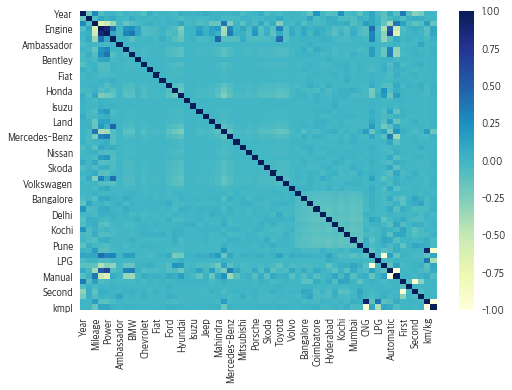

In [214]:
sns.heatmap(data = fixed_data.corr(), cmap = 'YlGnBu')

### VIF Check
데이터 간 상관관계를 파악하기 위해 VIF를 체크해 보았다.

In [29]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [30]:
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(fixed_data.values, i) for i in range(0, fixed_data.shape[1])]
vif["features"] = fixed_data.columns
vif.sort_values(["VIF"], ascending=False)

/usr/local/lib/python3.8/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,VIF,features
29,inf,Renault
30,inf,Skoda
32,inf,Toyota
33,inf,Volkswagen
34,inf,Volvo
35,inf,Ahmedabad
36,inf,Bangalore
37,inf,Chennai
38,inf,Coimbatore
39,inf,Delhi


많은 수의 inf 값이 나타났다.
VIF에서 inf 값은 perfect correlation 관계에 있으므로, 값을 하나씩 제거해 주면서 값을 맞추었다.

In [31]:
fixed_data2 = fixed_data.drop('Renault', axis=1)

In [32]:
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(fixed_data2.values, i) for i in range(0, fixed_data2.shape[1])]
vif["features"] = fixed_data2.columns
vif.sort_values(["VIF"], ascending=False)

/usr/local/lib/python3.8/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,VIF,features
56,inf,kmpl
50,inf,Manual
38,inf,Delhi
37,inf,Coimbatore
36,inf,Chennai
35,inf,Bangalore
34,inf,Ahmedabad
41,inf,Kochi
42,inf,Kolkata
43,inf,Mumbai


이 과정을 적당한 횟수만큼 반복한다

In [33]:
mask = ['kmpl', 'km/kg', "Third", 'CNG', 'Pune', "Manual", "First", 'Diesel', 'Engine'] # 다음 피처들 제거

In [34]:
fixed_data3 = fixed_data2.drop(mask, axis=1)

In [35]:
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(fixed_data3.values, i) for i in range(0, fixed_data3.shape[1])]
vif["features"] = fixed_data3.columns
vif.sort_values(["VIF"], ascending=False)

,VIF,features
3,3.933690,Power
44,3.682337,Petrol
22,3.444606,Maruti
45,3.173930,Automatic
2,3.129742,Mileage
15,2.949091,Hyundai
4,2.362012,Seats
14,2.227213,Honda
7,2.172956,BMW
23,2.151519,Mercedes-Benz


다중공산성 문제가 해결되었다고 볼 수 있다.

In [36]:
# 색이 진하게 나타나는 부분이 있어서 확인
data.corr()['Price'].sort_values(ascending=False)

Price                1.000000
Year                 0.305327
Seats                0.052225
Kilometers_Driven   -0.011493
Unnamed: 0          -0.020275
Name: Price, dtype: float64

상관관계가 지나치게 높게 나타나는 경우도 없다고 판단하겠다.

# Linear Regression

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error

In [38]:
X_train, X_test, y_train, y_test = train_test_split(fixed_data3, target, test_size=0.2, random_state=0)

In [39]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [40]:
pred = model.predict(X_train)

## 회귀 결과

In [41]:
# R-square
model.score(X_train, y_train)

0.7835518453874464

In [42]:
# 추정값과 실제값의 MSE
mean_squared_error(y_train, pred)

25.519945768543167

In [43]:
# 회귀계수와 절편
print(model.coef_)
print(model.intercept_)

[ 3.27206759  0.22763897 -0.8173066   4.83446132  0.16846135  9.90822055
 10.09036423  8.9559502  18.05906803  0.24953151 -1.14180722 -0.13245599
 -1.88727004  1.26229762 -0.03197092  0.49946784 -0.7714589   1.44331355
 18.18369318  1.53821033 20.978228   -1.67452604  1.77615587 10.57697098
 15.85060855  2.73529165  0.38394444 18.4614181   0.21078127 -0.63954074
  2.57136386 -0.10439285  3.76494944 -0.22063233  1.25508575  0.53978306
  1.62856547 -0.77676311  1.02044578  0.3899675  -0.51659277 -1.27303692
 -1.17462205  1.24387217 -1.33059261  0.11327719 -0.33601059 -0.86335847]
7.728273705013788


In [44]:
model.score(X_test, y_test)

0.7790378323331948

In [45]:
pred_test = model.predict(X_test)

## Data plot

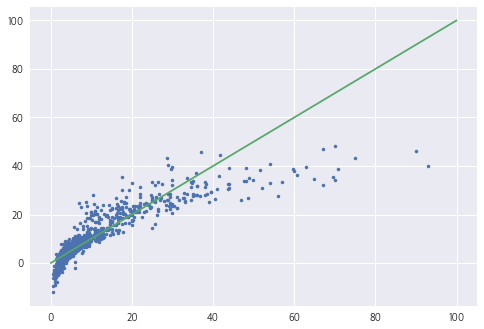

In [46]:
plt.plot(y_test, pred_test, '.')

# line
x = np.linspace(0, 100, 100)
y = x
plt.plot(x, y)
plt.show()

값이 낮은 경우에는 직선에서 많이 떨어지지는 않았지만, 오차가 갈수록 커지는 것을 확인할 수 있었다.

## 정규화된 데이터 회귀

In [47]:
ridge = Ridge(alpha = 1.0)
ridge.fit(X_train, y_train)

# R-square
ridge.score(X_train, y_train)

0.7830529077590399

In [48]:
lasso = Lasso(alpha = 0.3)
lasso.fit(X_train, y_train)

# R-square
lasso.score(X_train, y_train)

0.6929122613043912

## OLS

In [49]:
import statsmodels.api as sm

In [50]:
model = sm.OLS(target, fixed_data3)

In [51]:
result = model.fit()

In [52]:
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:                  Price   R-squared (uncentered):                   0.872
Model:                            OLS   Adj. R-squared (uncentered):              0.871
Method:                 Least Squares   F-statistic:                              824.1
Date:                Mon, 01 Feb 2021   Prob (F-statistic):                        0.00
Time:                        18:36:03   Log-Likelihood:                         -18024.
No. Observations:                5870   AIC:                                  3.614e+04
Df Residuals:                    5822   BIC:                                  3.647e+04
Df Model:                          48                                                  
Covariance Type:            nonrobust                                                  
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

p-value 값이 큰 지표가 몇개 있었으므로, 제거해서 확인해 보고자 한다.

In [53]:
fixed_data4 = fixed_data3.drop(["Fourth & Above", "Force", 'ISUZU', 'Isuzu','Delhi','Kolkata','LPG','Automatic','Mumbai'], axis=1)

In [54]:
model = sm.OLS(target, fixed_data4)
result = model.fit()
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:                  Price   R-squared (uncentered):                   0.871
Model:                            OLS   Adj. R-squared (uncentered):              0.871
Method:                 Least Squares   F-statistic:                              1013.
Date:                Mon, 01 Feb 2021   Prob (F-statistic):                        0.00
Time:                        18:36:04   Log-Likelihood:                         -18032.
No. Observations:                5870   AIC:                                  3.614e+04
Df Residuals:                    5831   BIC:                                  3.640e+04
Df Model:                          39                                                  
Covariance Type:            nonrobust                                                  
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

성능이 크게 좋아지지 않았지만, 간단한 모델이 되었다.

## Log 변환된 모델로 적용

In [62]:
X_train, X_test, y_train, y_test = train_test_split(fixed_data3, log_target, test_size=0.2, random_state=0)

In [63]:
log_model = LinearRegression()
log_model.fit(X_train, y_train)
log_pred = log_model.predict(X_train)
# R-square
log_model.score(X_train, y_train)

0.9229416577189768

In [65]:
# 추정값과 실제값의 MSE
mean_squared_error(y_train, log_pred)

0.056693616992548754

In [68]:
log_model.score(X_test, y_test) # 기존 77에 비해 상당히 많이 향상됐다.₩

0.9292919753541208

In [70]:
log_pred_test = log_model.predict(X_test)

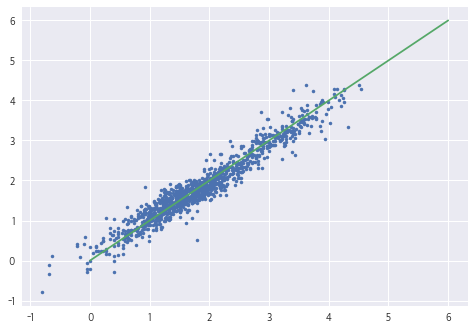

In [74]:
plt.plot(y_test, log_pred_test, '.')

# line
x = np.linspace(0, 6, 6)
y = x
plt.plot(x, y)
plt.show()

기존보다 훨씬 고르게 분포된 모습을 보인다.

In [77]:
log_model = sm.OLS(log_target, fixed_data3)
log_model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Price   R-squared (uncentered):                   0.972
Model:                            OLS   Adj. R-squared (uncentered):              0.972
Method:                 Least Squares   F-statistic:                              4192.
Date:                Mon, 01 Feb 2021   Prob (F-statistic):                        0.00
Time:                        18:49:48   Log-Likelihood:                         -2021.2
No. Observations:                5870   AIC:                                      4138.
Df Residuals:                    5822   BIC:                                      4459.
Df Model:                          48                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Year                  0.4061      0.006     72.167      0.000       0.395       0.417
Kilometers_Driven     0.0013      0.005      0.280      0.779      -0.008       0.010
Mileage              -0.0308      0.008     -3.887      0.000      -0.046      -0.015
Power                 0.3134      0.009     35.314      0.000       0.296       0.331
Seats                 0.0612      0.007      8.894      0.000       0.048       0.075
Ambassador            1.6893      0.344      4.908      0.000       1.015       2.364
Audi                  2.0546      0.031     66.471      0.000       1.994       2.115
BMW                   2.0399      0.031     65.336      0.000       1.979       2.101
Bentley               1.9891      0.351      5.668      0.000       1.301       2.677
Chevrolet             1.1064      0.034     32.213      0.000       1.039       1.174
Datsun                0.9143      0.097      9.410      0.000       0.724       1.105
Fiat                  1.2054      0.073     16.559      0.000       1.063       1.348
Force                 1.6140      0.199      8.102      0.000       1.223       2.005
Ford                  1.3886      0.024     57.447      0.000       1.341       1.436
Honda                 1.4548      0.021     69.648      0.000       1.414       1.496
Hyundai               1.4009      0.018     77.398      0.000       1.365       1.436
ISUZU                 1.3585      0.243      5.580      0.000       0.881       1.836
Isuzu                 1.4810      0.344      4.304      0.000       0.806       2.156
Jaguar                2.1386      0.060     35.719      0.000       2.021       2.256
Jeep                  1.7403      0.090     19.307      0.000       1.564       1.917
Land                  2.3220      0.051     45.676      0.000       2.222       2.422
Mahindra              1.3589      0.028     47.696      0.000       1.303       1.415
Maruti                1.3794      0.019     74.313      0.000       1.343       1.416
Mercedes-Benz         2.1250      0.028     75.118      0.000       2.070       2.180
Mini                  2.4820      0.070     35.345      0.000       2.344       2.620
Mitsubishi            1.8420      0.068     27.109      0.000       1.709       1.975
Nissan                1.4141      0.039     36.457      0.000       1.338       1.490
Porsche               1.9463      0.094     20.730      0.000       1.762       2.130
Skoda                 1.5332      0.030     50.537      0.000       1.474       1.593
Tata                  0.9803      0.029     34.271      0.000       0.924       1.036
Toyota                1.7615      0.024     72.517      0.000       1.714       1.809
Volkswagen            1.4284      0.024     60.509      0.00

`Fourth & Above` 와 `Second` 가 p값이 높아 제거해 주고 다시 분석했다.

In [78]:
fixed_data4 = fixed_data3.drop(["Fourth & Above", "Second"], axis=1)

In [82]:
log_model = sm.OLS(log_target, fixed_data4)
log_result = log_model.fit()
log_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Price   R-squared (uncentered):                   0.972
Model:                            OLS   Adj. R-squared (uncentered):              0.972
Method:                 Least Squares   F-statistic:                              4375.
Date:                Mon, 01 Feb 2021   Prob (F-statistic):                        0.00
Time:                        18:53:32   Log-Likelihood:                         -2021.9
No. Observations:                5870   AIC:                                      4136.
Df Residuals:                    5824   BIC:                                      4443.
Df Model:                          46                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Year                  0.4056      0.005     74.288      0.000       0.395       0.416
Kilometers_Driven     0.0014      0.005      0.293      0.769      -0.008       0.010
Mileage              -0.0310      0.008     -3.913      0.000      -0.046      -0.015
Power                 0.3133      0.009     35.306      0.000       0.296       0.331
Seats                 0.0613      0.007      8.911      0.000       0.048       0.075
Ambassador            1.6869      0.344      4.902      0.000       1.012       2.362
Audi                  2.0552      0.031     66.791      0.000       1.995       2.116
BMW                   2.0406      0.031     65.631      0.000       1.980       2.102
Bentley               1.9892      0.351      5.668      0.000       1.301       2.677
Chevrolet             1.1068      0.034     32.297      0.000       1.040       1.174
Datsun                0.9152      0.097      9.422      0.000       0.725       1.106
Fiat                  1.2062      0.073     16.588      0.000       1.064       1.349
Force                 1.6143      0.199      8.103      0.000       1.224       2.005
Ford                  1.3902      0.024     57.884      0.000       1.343       1.437
Honda                 1.4555      0.021     70.044      0.000       1.415       1.496
Hyundai               1.4018      0.018     78.138      0.000       1.367       1.437
ISUZU                 1.3591      0.243      5.583      0.000       0.882       1.836
Isuzu                 1.4816      0.344      4.306      0.000       0.807       2.156
Jaguar                2.1393      0.060     35.760      0.000       2.022       2.257
Jeep                  1.7414      0.090     19.327      0.000       1.565       1.918
Land                  2.3228      0.051     45.874      0.000       2.224       2.422
Mahindra              1.3592      0.028     47.936      0.000       1.304       1.415
Maruti                1.3804      0.018     74.808      0.000       1.344       1.417
Mercedes-Benz         2.1256      0.028     75.462      0.000       2.070       2.181
Mini                  2.4833      0.070     35.421      0.000       2.346       2.621
Mitsubishi            1.8418      0.068     27.116      0.000       1.709       1.975
Nissan                1.4148      0.039     36.546      0.000       1.339       1.491
Porsche               1.9475      0.094     20.764      0.000       1.764       2.131
Skoda                 1.5337      0.030     50.657      0.000       1.474       1.593
Tata                  0.9812      0.028     34.554      0.000       0.926       1.037
Toyota                1.7625      0.024     72.968      0.000       1.715       1.810
Volkswagen            1.4291      0.024     60.789      0.00

모델이 더 간단해진 것을 확인할 수 있었다.

# 회귀분석 가정 (잔차의 정규성)

In [55]:
import scipy.stats

In [56]:
pred = result.predict()

In [57]:
# 잔차 구하기
residual = target - pred

In [58]:
sr = scipy.stats.zscore(residual)
(x, y), _ = scipy.stats.probplot(sr) # 잔차의 정규성 검정

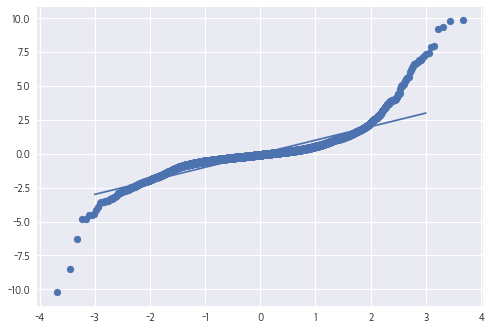

In [59]:
plt.scatter(x, y)
plt.plot([-3,3], [-3,3])
plt.show()

/usr/local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


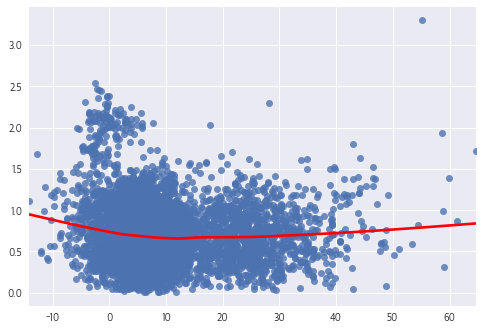

In [87]:
# 잔차의 등분산성 
sns.regplot(pred, np.sqrt(np.abs(sr)), lowess=True, line_kws={'color': 'red'})
plt.show()

- 잔차의 정규성과 공분산성 모두 완벽한 정도로는 만족하지 못했다.
- 모형의 수정이 조금 필요할 듯 하다.

## Log 모델 잔차의 정규성 테스트

In [83]:
log_pred = log_result.predict()

In [84]:
# 잔차 구하기
log_residual = log_target - log_pred

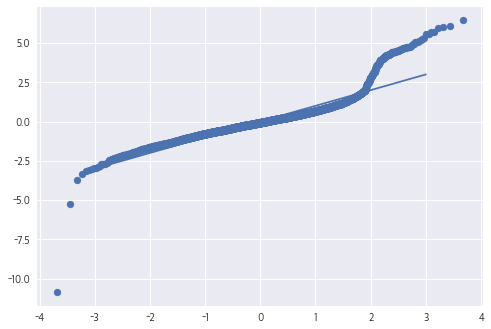

In [86]:
sr = scipy.stats.zscore(log_residual)
(x, y), _ = scipy.stats.probplot(sr)
plt.scatter(x, y)
plt.plot([-3,3], [-3,3])
plt.show()

훨씬 더 직선에 더 가까워 진것을 확일할 수 있다.

/usr/local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


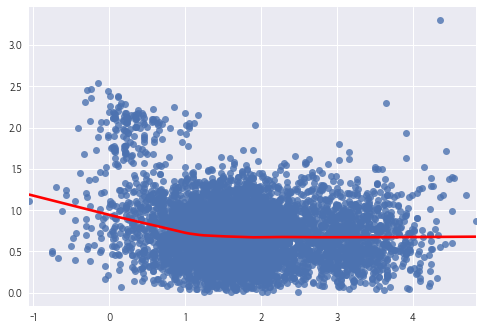

In [88]:
# 잔차의 등분산성 
sns.regplot(log_pred, np.sqrt(np.abs(sr)), lowess=True, line_kws={'color': 'red'})
plt.show()

직선이 점점 수평에 가까워 지는 것을 확인할 수 있었다.